In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import scipy as sc 
import seaborn as sns 
import plotly.graph_objects as go 
import plotly.express as px 
plt.rcParams["figure.figsize"] = [10, 5] 

/Users/yongpengfu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


`Low Bias models`: k-Nearest Neighbors (k=1), Decision Trees and Support Vector Machines.

`High Bias models`: Linear Regression and Logistic Regression.

`Low Variance models`: Linear Regression and Logistic Regression.

`High Variance models`: k-Nearest Neighbors (k=1), Decision Trees and Support Vector Machines.

`What is Irreducible Error?`  
Irreducible Error is the error that cannot be reduced irrespective of the models. It is a measure of the amount of noise in our data due to unknown variables. This error cannot be removed.

`How are Bias, Variance and Irreducible Errors are related?`  
Error in a Machine Learning model is the sum of Reducible and Irreducible errors.  
Error = Reducible Error + Irreducible Error  
Reducible Error is the sum of squared Bias and Variance.  
Reducible Error = Bias² + Variance  
Combining the above two equations, we get  
Error = Bias² + Variance + Irreducible Error

`Overfitting`: It is a Low Bias and High Variance model. Generally, Decision trees are prone to Overfitting.  
`Underfitting`: It is a High Bias and Low Variance model. Generally, Linear and Logistic regressions are prone to Underfitting.


# Supervised Learning

## Regression
## 1. Regression using Support Vector Machines (SVMs)

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
#mean_squared_error is for regression
#accuracy_score, confusion_matrix are for classification
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

def main():
    #load the data
    X, y = load_boston(return_X_y = True)
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    #call the model
    reg = SVR(kernel = "rbf", C = 1.0, gamma = "auto")
    #fit the data
    reg.fit(X_train, y_train)
    #predict
    y_pred = reg.predict(X_test)
    #metrics: the coefficient of determination of the prediction.
    score = reg.score(X_test, y_test)
    #metrics: MSE (mean squre error)
    print('MSE: %.2f'%(mean_squared_error(y_test, y_pred)))
    return score
main()

MSE: 82.80


0.013173874942115193

## Regression
## 2. Regression using LinearRegression

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
#mean_squared_error is for regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def main():
    X, y = load_boston(return_X_y = True)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
    #initiate the model
    model = LinearRegression()
    #fit the model
    model.fit(X_train, y_train)
    #Predict
    y_pred = model.predict(X_test)
    #R square
    score = model.score(X_test, y_test)
    print('MSE: %.2f'%(mean_squared_error(y_test, y_pred)))
    return (round(score,2))
main()

MSE: 33.45


0.59

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#mean_squared_error is for regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def main():
    X, _ = load_iris(return_X_y = True)
    sepal = X[:,:2]
    petal_length = X[:,2]
    sepal_train, sepal_test, petal_train, petal_test = train_test_split(sepal, petal_length,
                                                                       test_size = 0.2)
    #initiate the model
    model = LinearRegression()
    #fit the model
    model.fit(sepal_train, petal_train)
    #predict
    petal_pred = model.predict(sepal_test)
    #R square
    score = model.score(sepal_test, petal_test)
    #MSE
    print('MSE:%.2f'%(mean_squared_error(petal_test,petal_pred)))
    print( np.around(model.coef_, decimals=2))
    return(round(score,2))
main()

MSE:0.42
[ 1.79 -1.34]


0.87

## Regression
## 3. Linear Regression Feature Importance

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


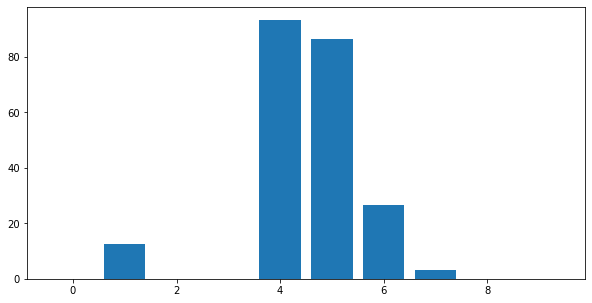

In [5]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Regression
## 5. k-Nearst Neighbor (KNN) Regression

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#load the data
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
#initiate the model
model = KNeighborsRegressor(n_neighbors = 3)
#fit the model
model.fit(X_train, y_train)
#Predict
y_pred = model.predict(X_test)
#R square
score = model.score(X_test, y_test)
print('MSE: %.2f'%(mean_squared_error(y_test, y_pred)))
print('R square = %.2f'%model.score(X_test, y_test))

MSE: 48.60
R square = 0.40


## Regression
## 6. Tree Decision Regression and Random Forest Regression

In [8]:
#Tree Decision Regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#load the data
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
#initiate the model
model = DecisionTreeRegressor(criterion = 'mae', random_state = 0)
#fit the model
model.fit(X_train, y_train)
#Predict
y_pred = model.predict(X_test)
#R square
score = model.score(X_test, y_test)
print('MSE: %.2f'%(mean_squared_error(y_test, y_pred)))
print('MAE: %.2f'%(mean_absolute_error(y_test, y_pred)))
print('R square = %.2f'%model.score(X_test, y_test))

MSE: 29.08
MAE: 3.37
R square = 0.65


In [9]:
#Random Forest Regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#load the data
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
#initiate the model
model = RandomForestRegressor(n_estimators = 25, criterion = 'mae', random_state = 0)
#fit the model
model.fit(X_train, y_train)
#Predict
y_pred = model.predict(X_test)
#R square
score = model.score(X_test, y_test)
print('MSE: %.2f'%(mean_squared_error(y_test, y_pred)))
print('MAE: %.2f'%(mean_absolute_error(y_test, y_pred)))
print('r2 square = %.2f'%r2_score(y_test, y_pred))
print('R square = %.2f'%model.score(X_test, y_test))

MSE: 15.23
MAE: 2.50
r2 square = 0.82
R square = 0.82


## Classification
## 1. Logistic regression

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#mean_squared_error is for regression
#accuracy_score, confusion_matrix are for classification
from sklearn.metrics import mean_squared_error,precision_score,accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

#Load data
X, y = load_iris(return_X_y = True)
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)
#initialize and fit the model
model = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 1000)
model.fit(X_train, y_train)
#predict the test dataset
y_pred = model.predict(X_test)

#precision_score
#each classes’s contribution to the average is weighted by its size
print('%.2f'%precision_score(y_test, y_pred, average = 'weighted'))
#all samples equally contribute to the final averaged metric
print('%.2f'%precision_score(y_test, y_pred, average = 'micro'))
#all classes equally contribute to the final averaged metric
print('%.2f'%precision_score(y_test, y_pred, average = 'macro'))


0.98
0.98
0.99


## Classification
## 1. K-nearest Neighbos Classification (KNN)

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#load the dataset
X,y = load_iris(return_X_y = True)
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
#initiate and fit the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
#predict 
y_pred = model.predict(X_test)
#accuracy score
print(model.score(X_test, y_test))

1.0


In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
#mean_squared_error is for regression
#accuracy_score, confusion_matrix are for classification
from sklearn.metrics import mean_squared_error,precision_score,accuracy_score, confusion_matrix


#using pandas to do the exercise
dataset_31_credit_g = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/dataset_31_credit-g.csv")
y = dataset_31_credit_g.iloc[:,-1].values
encoded_y = LabelEncoder().fit_transform(y)
selected_X = dataset_31_credit_g.iloc[:,[0,1,2,3,4,7,10]].values
selected_X[:,[0,2,3]] = OrdinalEncoder().fit_transform(selected_X[:,[0,2,3]])
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(selected_X, encoded_y, test_size = 0.1, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(selected_X, encoded_y, test_size = 0.11, random_state = 0)
#initiate and fit the model
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
#predict 
y_pred = model.predict(X_test)
#accuracy score
print(model.score(X_test, y_test))
#confusion_matrix
print(confusion_matrix(y_test, y_pred))

0.72
[[ 4 21]
 [ 7 68]]


## Classification
## 2. Classification using Support Vector Machines (SVMs)

In [13]:
from sklearn.datasets import load_iris
#now you are using Support Vector Classifier (SVC) rather than Support Vector Regression (SVR)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score

#load the data
X,y = load_iris(return_X_y = True)
#initiate the classifier
classifier = SVC(kernel = 'linear', C = 1.0, gamma = 'auto')
#fit the classifier
classifier.fit(X_train, y_train)
#predict
y_pred = classifier.predict(X_test)
#accuracy score, precision score
print('accuracy score = %.2f, precision score = %.2f'%(precision_score(y_test,y_pred,
                                                                      average = 'weighted'),
                                                      classifier.score(X_test, y_test)))

accuracy score = 0.77, precision score = 0.78


## Classification
## 3. Tree Based ALgorithms

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

#load the data
X,y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)
#initiate the model
model = DecisionTreeClassifier(criterion = 'entropy')
#fit the model
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#accuracy score, recall score
print("Accuracy = %.2f and Recall score = %.2f"%(precision_score(y_test,y_pred,
                                                                      average = 'weighted'),
                                                      model.score(X_test, y_test)))

Accuracy = 0.96 and Recall score = 0.96


### 3.1 RandomForest Classifer

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

#load the data
X,y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)
#initiate the model
model = RandomForestClassifier(n_estimators=100, criterion='gini')
#fit the model
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#accuracy score, recall score
print("Accuracy = %.2f and Recall score = %.2f"%(precision_score(y_test,y_pred,
                                                                      average = 'weighted'),
                                                      model.score(X_test, y_test)))

Accuracy = 0.96 and Recall score = 0.96


## Preprocessing
### 1. LabelEncoder (for target) and OneHotEncoder (for features)

* Steps of data preprocessing:
    * Cleaning: 
    * Encoding;
    * Scaling; and
    * Feature reduction.

In [16]:
# LabelEncoder and OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#get the data
mushroom = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/mushroom_csv.csv")
y = mushroom.iloc[:,-1].values #convert it to array
X = mushroom.iloc[:, 1:3].values #convert it to array

#initiate the encoder
LabelEncoder = LabelEncoder()
OneHotEncoder = OneHotEncoder() #NO na value allowed in the record

#Combine fitting and encoding
encoded_y = LabelEncoder.fit_transform(y)
encoded_X = OneHotEncoder.fit_transform(X) #the result is scipy.sparse.csr.csr_matrix
#you need to convrt it back to array
encoded_X = encoded_X.toarray()
#return 1D array
print(encoded_y.shape)
#return 2D array with rows the same, but total columns = levels of all columns
# np.unique(X[:,0]).size + np.unique(X[:,1]).size
print(encoded_X.shape)

(8124,)
(8124, 14)


In [17]:
#Use get_dummies instead of OneHotEncoder for pandas dataframe
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#1: using OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
#only encode a few columns from the dataset
mushroom = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/mushroom_csv.csv")
#OrdinalEncoder only accepts dataframe, but not series
mushroom.iloc[:, [1,3]] = OrdinalEncoder.fit_transform(mushroom.iloc[:, [1,3]])
mushroom.head(2)

#2: using get_dummies
mushroom = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/mushroom_csv.csv")
#drop the previous column used for encoding and concatnate with the encoded ones
new_mushroom = pd.concat([mushroom.drop(mushroom.columns[[1, 3]], axis = 1), pd.get_dummies(mushroom.iloc[:, [1,3]])], axis=1)
new_mushroom.head(2)


,cap-shape,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,spore-print-color,population,habitat,class,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises%3F_f,bruises%3F_t
0,x,n,p,f,c,n,k,e,e,s,...,k,s,u,p,0,0,1,0,0,1
1,x,y,a,f,c,b,k,e,c,s,...,n,n,g,e,0,0,1,0,0,1


## 2: Feature Scaling

- min-max scale the data between 0 and 1
- StandardScaler

In [18]:
#MinMaxScaler
datasets_1919 = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/datasets_1919_3310_flavors_of_cacao.csv")

from sklearn.preprocessing import MinMaxScaler
#initiate the model
scaler = MinMaxScaler()
#fit and transform directly
print(scaler.fit_transform(datasets_1919[["Rating"]]))
print()


#StandardScaler
datasets_1919 = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/datasets_1919_3310_flavors_of_cacao.csv")
from sklearn.preprocessing import StandardScaler
#initiate the model
scaler = StandardScaler()
#fit and transform directly
print(scaler.fit_transform(datasets_1919[["Rating"]]))


[[0.6875]
 [0.4375]
 [0.5   ]
 ...
 [0.625 ]
 [0.5625]
 [0.5   ]]

[[ 1.18023096]
 [-0.91212912]
 [-0.3890391 ]
 ...
 [ 0.65714094]
 [ 0.13405092]
 [-0.3890391 ]]


# Unsupervised Learning
- K-means clustering
- Hierarchical clustering
- Mean shift clustering
- Dimensionality Reduction with PCA
- Multidimensional Scaling (MDS)
- ISOMAP: Extension of MDS
- t-Distributed Stochastic Neighbour Embedding (t-SNE)

## K-means clustering

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#load the dataset (there is no taeget label, so only use X)
X, _ = load_iris(return_X_y = True)
#initiate the model
kmeans = KMeans(n_clusters = 3, random_state = 0, tol = 0.01)
#fit the model
kmeans.fit(X)
print(f'inertia: {kmeans.inertia_}\n')
print(f"clusters: \n {kmeans.predict(X)}")

inertia: 79.0120489607446

clusters: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Hierarchical Clustering

In [20]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

#load the data
X, _ = load_iris(return_X_y = True)
#initiate
agg_cluster = AgglomerativeClustering(n_clusters=3,linkage = 'ward')
#fit and predict at the same time
clusters = agg_cluster.fit_predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Mean Shift Clustering
The mean shift algorithm is a clustering algorithm that lies underneath the Hierachical Clustering Algorithms

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift

#load the dataset
X, _ = load_iris(return_X_y = True)
#initiate
mean_shift = MeanShift(bandwidth = None)
#fit and predict
mean_shift.fit(X)
clusters = mean_shift.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import MeanShift

#load the dataset
mushroom = pd.read_csv("/Users/yongpengfu/Desktop/AltaML/Encoding/mushroom_csv.csv")
selected_X = mushroom.iloc[:,1:3].values
encoded_X = OneHotEncoder().fit_transform(selected_X).toarray()
#initiate
mean_shift = MeanShift(bandwidth = 1.0)
#fit and predict
mean_shift.fit(encoded_X)
clusters = mean_shift.predict(encoded_X)
clusters

array([ 2, 14,  6, ...,  2,  0,  2])

## Dimensionality Reduction with PCA

In [23]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

#Load the data
X,_ = load_digits(return_X_y = True)
# n_comps = 15
# cat = 4
# pca = PCA(n_components=n_comps)
# pca.fit(digits.data[digits.target == cat,:])
#initiate the model
pca = PCA(n_components= None) #normally just take the first 2 components
#fit the model
pca.fit(X)
print(f'The original X shape is: {X.shape}')
print("Total 1797 samples and 64 features.\nSo total 64 components are returned.\n")
#find the explained_variance_ratio_: 
#The amount of variance explained by each of all components.
print(f"The percentage of variance explained by the all components is: {len(pca.explained_variance_ratio_)}\n")
#Principal axes in feature space, representing the directions of maximum variance in the data.
#what it returns is first 2 principle components with the same number of columns as the sample
#Total components is: n_components == min(n_samples, n_features)

print("""The prinicipal components can be used to explain feature.
Each row in the in the components_ represent one component, so there are total 64 components.
And each feature can then be explained by each column in components_""")
print(f"The Principal axes in feature space is: {pca.components_.shape}\n")
#The singular values corresponding to each of the selected components.
print(f"The singular values corresponding to each of all components is {len(pca.singular_values_)}")


print("What you end of doing the most is to compute the first two principal components for the entire digits dataset")
pembedding = PCA(n_components=2)
pca_transformed = pembedding.fit_transform(X)
pca_transformed.shape #1797 samples, and 2 components

The original X shape is: (1797, 64)
Total 1797 samples and 64 features.
So total 64 components are returned.

The percentage of variance explained by the all components is: 64

The prinicipal components can be used to explain feature.
Each row in the in the components_ represent one component, so there are total 64 components.
And each feature can then be explained by each column in components_
The Principal axes in feature space is: (64, 64)

The singular values corresponding to each of all components is 64
What you end of doing the most is to compute the first two principal components for the entire digits dataset


(1797, 2)

## Multidimensional Scaling (MDS)
Isomap builds a neighbourhood graph between points in the high dimensional space and uses the shortest distance between nodes as a measure of similarity.
Each point is connected to a certain number of its closest (in the Euclidean sense) neighbours. Edge weights correspond to Euclidean distances.
Dijkstra's algorithm can be used to compute shortest distances.
Sensitive to initial conditions.
Implemented in scikit-learn.

(1797, 2)


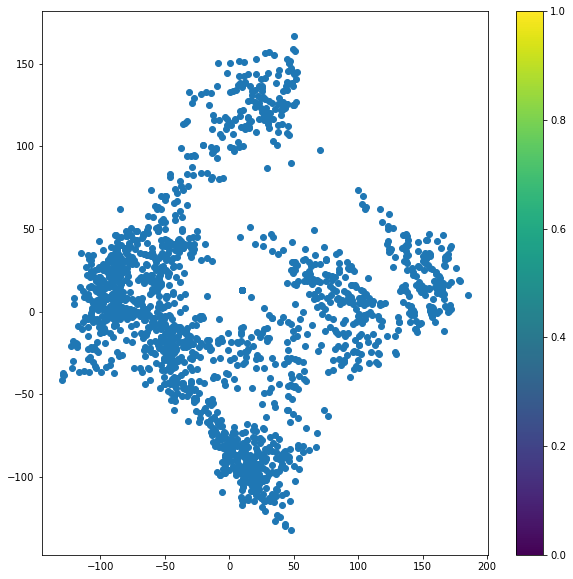

In [24]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

#Load the data
X,_ = load_digits(return_X_y = True)

embedding = Isomap(n_neighbors=6, n_components=2)
iso_transformed = embedding.fit_transform(X)
print(iso_transformed.shape)
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(iso_transformed[:,0], iso_transformed[:,1])
plt.colorbar(sc, spacing='proportional')
plt.show()